Submission by Muhammad Fausta

# Import library

In [1]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load Dataset

Pada tahap ini kita perlu memuat keseluruhan dataset yang tersedia untuk memastikan bahwa tidak ada informasi yang hilang. Nantinya dataset tersebut akan dicek satu per satu lalu pada akhirnya dilakukan merging (penggabungan) keseluruhan dataset yang ada menjadi satu dataset utuh yang memuat keseluruhan informasi dari dataset E-Commerce yang digunakan

In [2]:
# memuat dataset dalam bentuk pandas dataframe
customers = pd.read_csv('./data/customers_dataset.csv')
order_items = pd.read_csv('./data/order_items_dataset.csv')
order_payments = pd.read_csv('./data/order_payments_dataset.csv')
order_reviews = pd.read_csv('./data/order_reviews_dataset.csv')
orders = pd.read_csv('./data/orders_dataset.csv')
products = pd.read_csv('./data/products_dataset.csv')
sellers = pd.read_csv('./data/sellers_dataset.csv')
product_category_name = pd.read_csv('./data/product_category_name_translation.csv')
geolocation = pd.read_csv('./data/geolocation_dataset.csv')


# Preprocessing data

Pada tahap ini kita akan melakukan merging dataset terlebih dahulu karena dataset tersebut terpisah dalam 8 csv yang berbeda. Langkah berikutnya barulah kita akan mengeksplorasi dataset tersebut lebih lanjut.

Sebelum dapat melakukan merging, kita perlu mengecek terlebih dahulu masing-masing dataset yang ada, hal ini perlu dilakukan agar saat menggabungkan 2 dataset atau lebih tidak terjadi kesalahan dalam proses merging.

### Checking dataset

Order

In [3]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [5]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Customers

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Geolocation

In [8]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Sellers

In [9]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Products

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Merging dataset

##### Order

Untuk dataset order, kita dapat melakukan merging berdasarkan kolom order_id sebagai identifikasi unik dari dataset order karena setiap order_id hanya memiliki 1 baris data dan keempat dataset order yang ada memiliki kolom order_id.

In [12]:
orders_items = pd.merge(orders, order_items, on='order_id', how='outer')
orders_items_reviews = pd.merge(orders_items, order_reviews, on='order_id', how='outer')
# orders_items_reviews_payments = pd.merge(orders_items_reviews, order_payments, on=['order_id', 'product_id', 'seller_id', 'price', 'freight_value', 'shipping_limit_date', 'order_item_id'], how='outer')
orders_items_reviews_payments = pd.merge(orders_items_reviews, order_payments, on=['order_id',], how='outer')

##### Product

Untuk dataset product, kita dapat melakukan merging berdasarkan kolom product_category_name karena setiap produk hanya memiliki 1 kategori produk saja.

In [13]:
product_full = pd.merge(products, product_category_name, on='product_category_name', how='outer')

##### Order dan Product

Kemudian kita dapat menggabungkan dataset order dan product berdasarkan kolom product_id karena pada setiap order akan memiliki beberapa produk yang dipesan.

In [14]:
order_and_product = pd.merge(orders_items_reviews_payments, product_full, on='product_id', how='outer')

##### Order dan Customer

Lalu, kita akan menggabungkan dataset order, produk, dan customer berdasarkan kolom customer_id karena setiap order akan memiliki 1 customer yang melakukan pemesanan.

In [15]:
order_and_product_and_customer = pd.merge(order_and_product, customers, on='customer_id', how='outer')

##### Order dan Seller

Selanjutnya, kita akan menggabungkan dataset order, produk, customer, dan seller berdasarkan kolom seller_id karena setiap order akan memiliki 1 seller yang mengirimkan produk yang dipesan.

In [16]:
order_product_customer_seller = pd.merge(order_and_product_and_customer, sellers, on='seller_id', how='outer')
order_product_customer_seller.dropna(inplace=True)

##### Assessing Dataset

kita perlu menilai dataset yang nantinya akan digunakan untuk proses EDA yang bertujuan agar kita bisa mendapatkan insight yang lebih baik dari dataset yang digunakan karena data yang diperlukan tidak ada yang hilang.

In [17]:
order_and_product_and_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

Kita akan membuang kolom 'review_comment_title' dan 'review_comment_message' karena mayoritas data pada kolom tersebut kosong dan tidak akan digunakan dalam proses EDA. Kemudian untuk menyamakan jumlah data dengan kolom yang memiliki data kosong, kita akan melakukan drop data dari baris yang memiliki nilai NaN

In [18]:
order_and_product_and_customer.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)
order_and_product_and_customer.dropna(inplace=True)

Berikutnya kita perlu mengecek datanya sekali lagi untuk memastikan bahwa tidak ada data yang hilang.

In [19]:
order_and_product_and_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 119142
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113193 non-null  object 
 1   customer_id                    113193 non-null  object 
 2   order_status                   113193 non-null  object 
 3   order_purchase_timestamp       113193 non-null  object 
 4   order_approved_at              113193 non-null  object 
 5   order_delivered_carrier_date   113193 non-null  object 
 6   order_delivered_customer_date  113193 non-null  object 
 7   order_estimated_delivery_date  113193 non-null  object 
 8   order_item_id                  113193 non-null  float64
 9   product_id                     113193 non-null  object 
 10  seller_id                      113193 non-null  object 
 11  shipping_limit_date            113193 non-null  object 
 12  price                         

Setelah dicek kembali, kita dapat memastikan bahwa dataset yang digunakan sudah siap untuk proses EDA.

# Exploratory Data Analysis 🚀

### Pertanyaan 📒

**1. Preferensi pembayaran manakah yang paling banyak digunakan oleh pengguna e-commerce pada 2 tahun terakhir ini?**

Sebelum dapat melakukan visualisasi untuk kolom yang berkaitan dengan tipe data date / datetime, kita perlu mengubah tipe data kolom tersebut menjadi tipe data datetime terlebih dahulu.

In [20]:
order_and_product_and_customer['order_purchase_timestamp'] = pd.to_datetime(order_and_product_and_customer['order_purchase_timestamp']).sort_values(ascending=True)

Disebabkan jumlah dataset yang digunakan sangat besar maka kita akan melakukan visualisasi data secara mingguan agar waktu pemrosesannya tidak terlalu lama.

In [21]:
order_product_visualization = order_and_product_and_customer[['payment_type', 'order_purchase_timestamp']]
order_product_visualization.set_index('order_purchase_timestamp', inplace=True)
weekly_sale = order_product_visualization.groupby('payment_type').resample('W').size().reset_index()
weekly_sale_reset = weekly_sale.reset_index()
melted_sale = pd.melt(weekly_sale_reset, id_vars=['payment_type'], value_vars=weekly_sale_reset.columns[1:], var_name='date', value_name='count')

In [22]:
melted_sale

,payment_type,date,count
0,boleto,2016-10-09,47
1,credit_card,2016-10-09,228
2,debit_card,2016-10-09,1
3,voucher,2016-10-09,15
4,boleto,2016-10-16,10
...,...,...,...
395,voucher,2018-08-26,29
396,boleto,2018-09-02,17
397,credit_card,2018-09-02,104
398,debit_card,2018-09-02,5


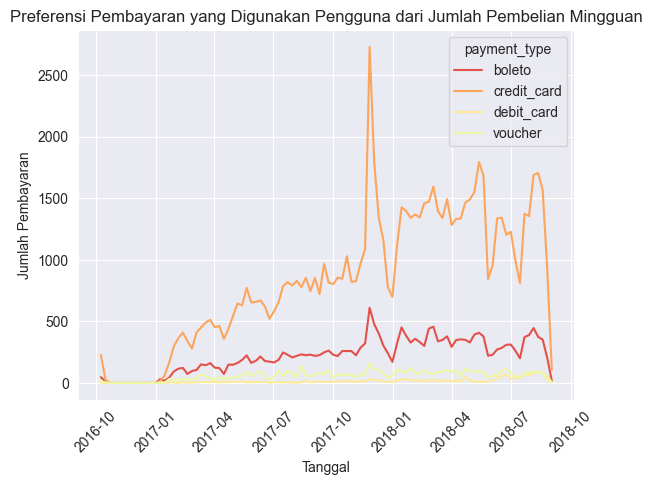

In [23]:
sns.set_style(style='darkgrid')
sns.set_palette('Spectral')
# sns.color_palette('Spectral', as_cmap=True)
sns.lineplot(data=melted_sale, x='date', y='count', hue='payment_type')
plt.title('Preferensi Pembayaran yang Digunakan Pengguna dari Jumlah Pembelian Mingguan', fontsize=12)
plt.xlabel('Tanggal', fontsize=10)
plt.ylabel('Jumlah Pembayaran', fontsize=10)
# plt.xlim('2018-08', '2018-10')
plt.xticks(rotation=45)
plt.show()

Dari hasil visualisasi data yang dilakukan, kita dapat mengamati bahwa ada 4 metode pembayaran yang digunakan oleh pengguna E-Commerce, yaitu : Boleto (metode pembayaran yang disediakan oleh bank di Brazil), Credit Card, Debit Card, dan Voucher (Voucher Pembelian atau Gift Card yang dibuat oleh pihak E-Commerce). Dari keempat metode pembayaran tersebut, metode pembayaran yang paling banyak digunakan oleh pengguna E-Commerce adalah Credit Card, diikuti oleh Boleto lalu voucher dan debit card. Jumlah transaksi yang terjadi mengalami fluktuasi secara periodik, dimana jumlah transaksi akan meningkat pada bulan-bulan tertentu dan menurun pada bulan-bulan tertentu. Puncak transaksi terjadi pada akhir tahun 2017, kemungkinan disebabkan oleh adanya event Black Friday dan Natal yang membuat banyak pengguna E-Commerce melakukan pembelian pada saat itu karena diskon secara besar-besaran yang diadakan oleh E-Commerce. Secara keseluruhan data, para grafik tersebut menunjukkan bahwa kecenderungan pengguna E-Commerce lebih memilih metode pembayaran Credit Card dibandingkan dengan metode pembayaran lainnya.

**2. Bagaimanakah perbandingan antara waktu pengiriman produk yang dikirim oleh seller dan waktu estimasi pengiriman yang diberikan oleh E-Commerce kepada pengguna?**

Sebelum dapat melakukan visualisasi untuk kolom yang berkaitan dengan tipe data date / datetime, kita perlu mengubah tipe data kolom tersebut menjadi tipe data datetime terlebih dahulu.

In [25]:
order_and_product_and_customer['order_estimated_delivery_date'] = pd.to_datetime(order_and_product_and_customer['order_estimated_delivery_date'])
order_and_product_and_customer['order_delivered_customer_date'] = pd.to_datetime(order_and_product_and_customer['order_delivered_customer_date'])

Untuk dapat menilai apakah suatu produk dikirim tepat waktu (sesuai estimasi) atau tidak kita dapat membuat kolom baru bernama 'is_late' yang berisi nilai True atau False. Jika nilai True maka produk tersebut dikirim terlambat, jika False maka produk tersebut dikirim tepat waktu (jika tanggal produk diterima melebihi estimasi).

In [26]:
order_and_product_and_customer['is_late'] = order_and_product_and_customer['order_estimated_delivery_date'] <= order_and_product_and_customer['order_delivered_customer_date']

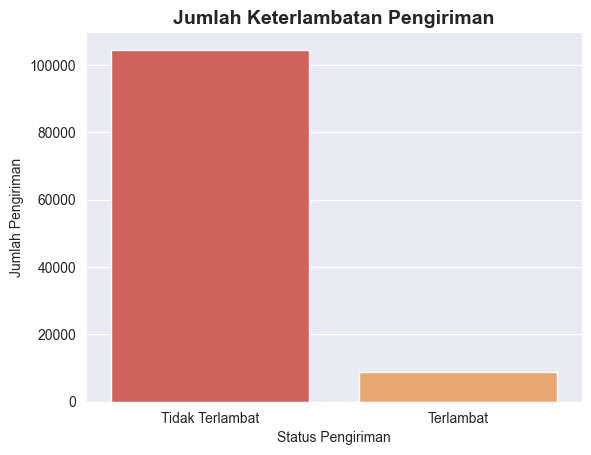

In [28]:
sns.countplot(data=order_and_product_and_customer, x='is_late',)
plt.title('Jumlah Keterlambatan Pengiriman', fontsize=14, fontdict={'weight': 'bold'})
plt.xticks(labels=['Tidak Terlambat', 'Terlambat'], ticks=[0, 1])
plt.xlabel('Status Pengiriman', fontsize=10)
plt.ylabel('Jumlah Pengiriman', fontsize=10)
plt.show()

In [139]:
print('Persentase jumlah keterlambatan pengiriman', round(order_and_product_and_customer['is_late'].value_counts(normalize=True)[1] * 100, 2), '%')

Persentase jumlah keterlambatan pengiriman 7.7 %


Dari hasil visualisasi tersebut, Kita dapat menilai bahwa secara keseluruhan, waktu pengiriman yang terjadi selalu lebih cepat dibandingkan dengan estimasi waktu pengiriman yang diberikan oleh E-Commerce kepada pengguna. Hal ini dapat dilihat dari grafik yang menunjukkan bahwa jumlah pengiriman yang terlambat hanyalah sekitar 8% dari keseluruhan pengiriman yang terjadi. Kita dapat menilai bahwa sistem yang melakukan kalkulasi estimasi waktu pengiriman sudah cukup akurat karena hanya sekitar 8% dari keseluruhan pengiriman yang terjadi yang terlambat. Penyebab keterlambatan pengiriman tersebut kemungkinan disebabkan oleh faktor yang belum dapat diperhitungkan oleh sistem, seperti banyaknya transaksi pembelian yang terjadi pada sistem.

**3. Bagaimanakah kondisi penjualan dari 5 kategori produk paling populer dalam 6 bulan terakhir?**

In [33]:
category_sale_six_month = order_and_product_and_customer.loc[(order_and_product_and_customer['order_purchase_timestamp'] > '2018-03-01') & (order_and_product_and_customer['order_purchase_timestamp'] < order_and_product_and_customer['order_purchase_timestamp'].max()) ,['product_category_name_english', 'order_purchase_timestamp']].groupby('product_category_name_english').resample('M', on='order_purchase_timestamp').size().reset_index()
category_sale_six_month.columns = ['product_category_name_english', 'order_purchase_timestamp', 'count']

In [34]:
#Mendapatkan 5 kategori produk dengan penjualan terbanyak selama 6 bulan terakhir
category_sale_six_month.groupby('product_category_name_english').sum().sort_values(by='count', ascending=False).index[:5]

C:\Users\alghi\AppData\Local\Temp\ipykernel_22264\2034137684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sale_six_month.groupby('product_category_name_english').sum().sort_values(by='count', ascending=False).index[:5]


Index(['health_beauty', 'bed_bath_table', 'housewares', 'sports_leisure',
       'furniture_decor'],
      dtype='object', name='product_category_name_english')

C:\Users\alghi\AppData\Local\Temp\ipykernel_13340\212245399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.relplot(kind='line', data=category_sale_six_month.loc[category_sale_six_month['product_category_name_english'].isin(category_sale_six_month.groupby('product_category_name_english').sum().sort_values(by='count', ascending=False).index[:5]), :], x='order_purchase_timestamp', y='count', hue='product_category_name_english', hue_order=category_sale_six_month.groupby('product_category_name_english').sum().sort_values(by='count', ascending=False).index[:5], ci=None, aspect=2, height=5)
C:\Users\alghi\AppData\Local\Temp\ipykernel_13340\212245399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to 

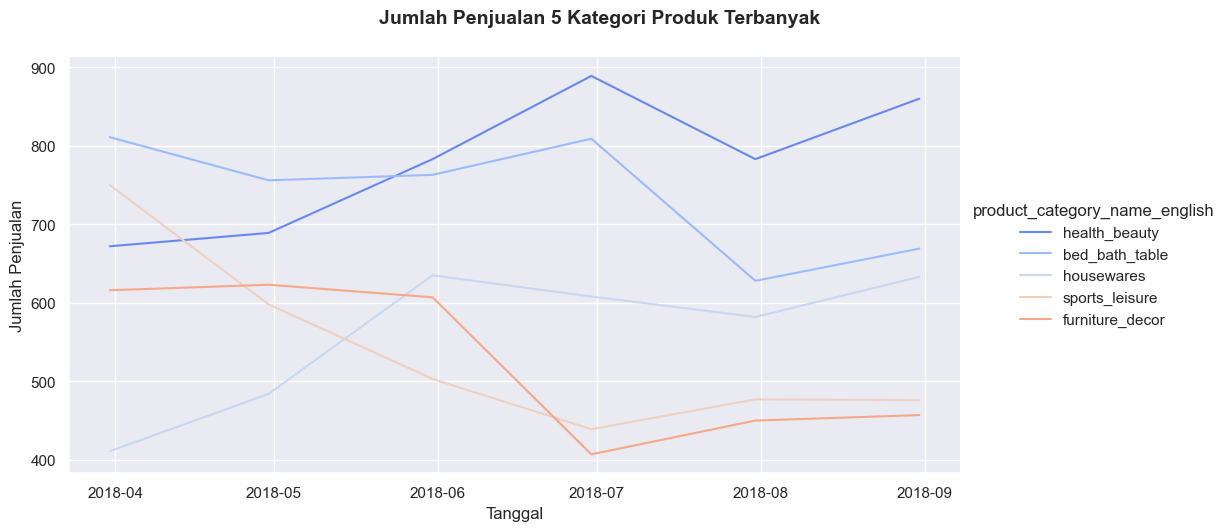

In [203]:
sns.set_palette('coolwarm')
g = sns.relplot(kind='line', data=category_sale_six_month.loc[category_sale_six_month['product_category_name_english'].isin(category_sale_six_month.groupby('product_category_name_english').sum().sort_values(by='count', ascending=False).index[:5]), :], x='order_purchase_timestamp', y='count', hue='product_category_name_english', hue_order=category_sale_six_month.groupby('product_category_name_english').sum().sort_values(by='count', ascending=False).index[:5], ci=None, aspect=2, height=5)
g.fig.suptitle('Jumlah Penjualan 5 Kategori Produk Terbanyak dalam 6 Bulan Terakhir', fontsize=14, fontweight='bold', y=1.06)
g.set(xlabel='Tanggal', ylabel='Jumlah Penjualan')
plt.show()

Visualisasi data tersebut menampilkan 5 kategori produk yang memiliki jumlah penjualan terbanyak dalam kurun waktu 6 bulan terakhir. Kategori produk "health_beauty" dan "housewares" terlihat memiliki tren peningkatan yang konsisten selama periode tersebut jika dibandingkan tiga kategori produk lainnya yang mengalami fluktuasi. Kita dapat menilai bahwa kategori produk "health_beauty" dan "housewares" memiliki permintaan yang tinggi dari pengguna E-Commerce karena kedua kategori produk tersebut memang sudah menjadi kebutuhan utama dalam kehidupan sehari-hari.